In [1]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm

%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")


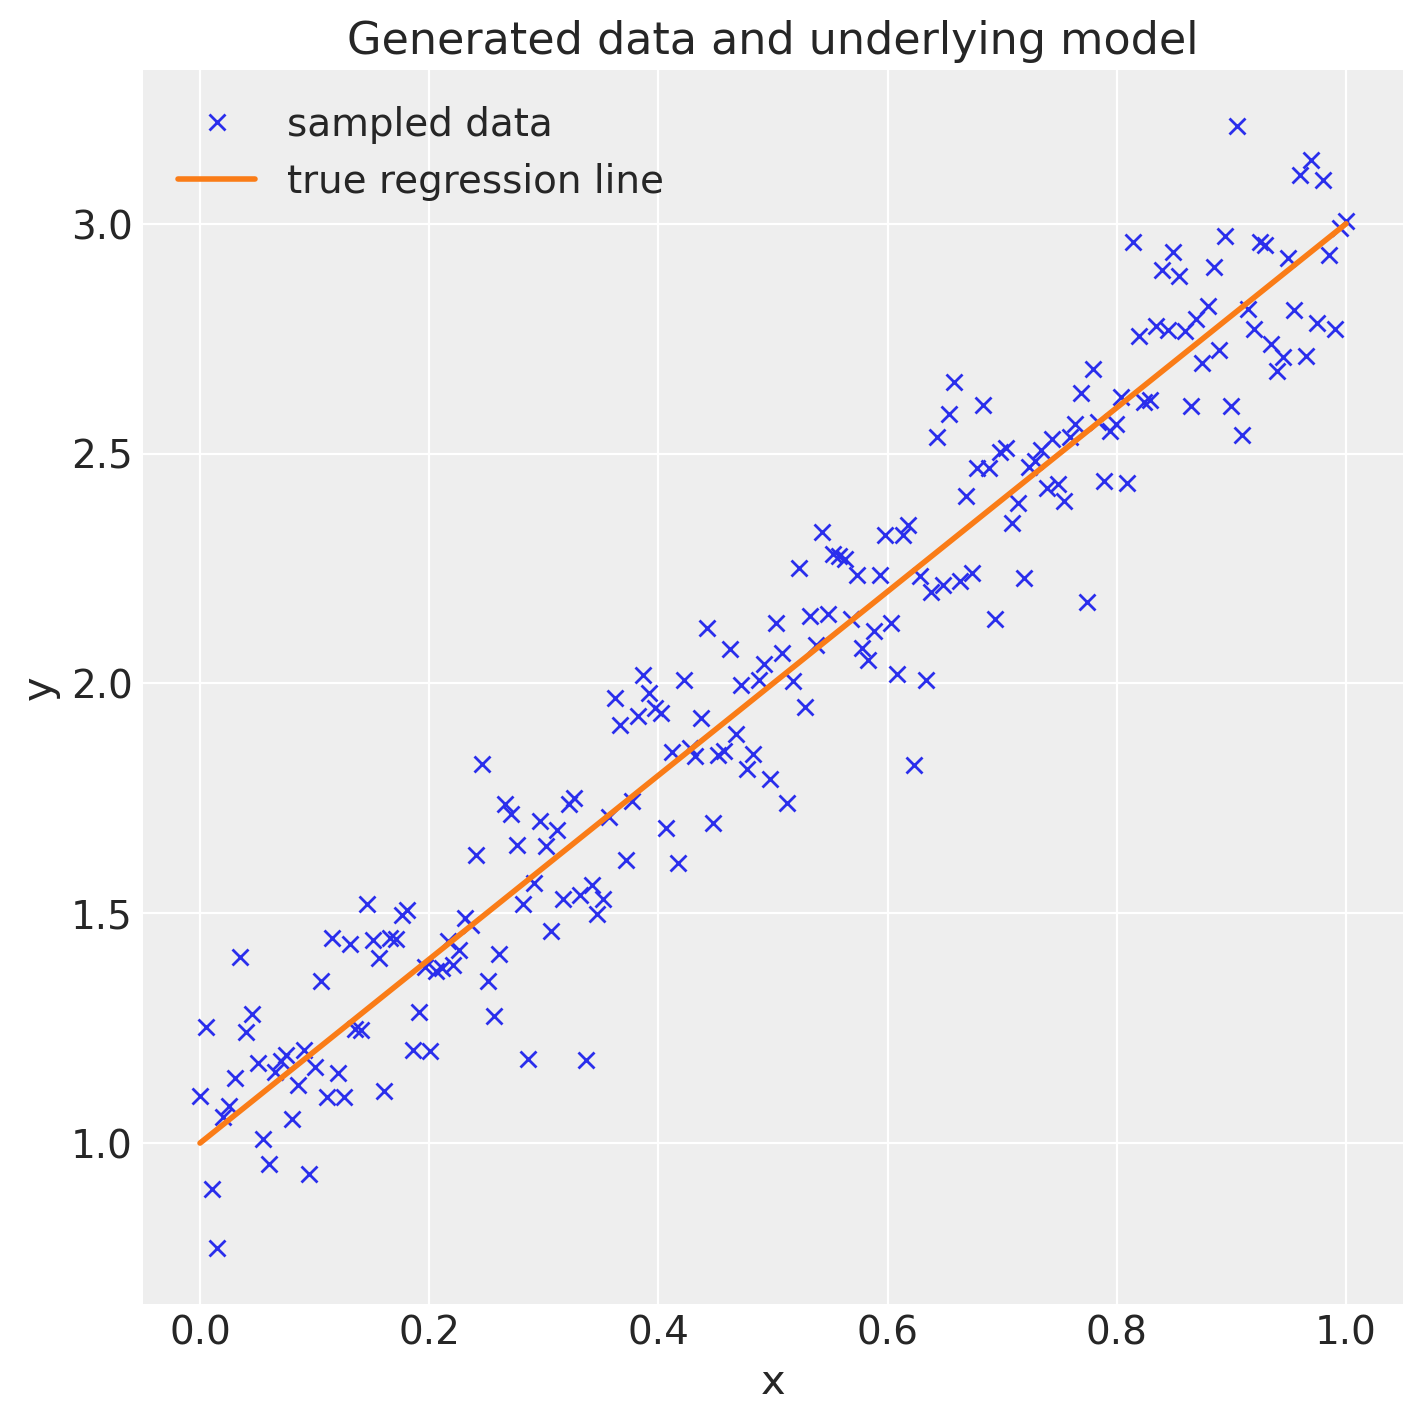

In [2]:
# data size
size = 200

# true line parameter
true_intercept = 1
true_slope = 2

# y = a + b*x
x = np.linspace(0, 1, size)
true_regression_line = true_intercept + true_slope * x

# add noise (sampled data)
y = true_regression_line + np.random.normal(scale=.15, size=size)

# simulate data 
data = dict(x=x, y=y)

# plot the data
fig = plt.figure(figsize=(7, 7));
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model');
ax.plot(x, y, 'x', label='sampled data');
ax.plot(x, true_regression_line, label='true regression line', lw=2.0);
plt.legend(loc=0);

In [3]:
with pm.Model() as naive_model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    intercept = pm.Normal('Intercept', 0, sigma=20)
    slope = pm.Normal('Slope', 0, sigma=20)
    
    target = intercept + slope * x
    
    # Define likelihood
    sigma = pm.HalfCauchy('sigma', beta=10)
    likelihood = pm.Normal('y', mu=target, sigma=sigma, observed=y)


ERROR (aesara.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (aesara.graph.rewriting.basic): node: InplaceDimShuffle{}(TensorConstant{(1,) of 200})
ERROR (aesara.graph.rewriting.basic): TRACEBACK:
ERROR (aesara.graph.rewriting.basic): Traceback (most recent call last):
  File "/Users/izhangxm/opt/miniconda3/envs/babaydata/lib/python3.10/site-packages/aesara/graph/rewriting/basic.py", line 1933, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/Users/izhangxm/opt/miniconda3/envs/babaydata/lib/python3.10/site-packages/aesara/graph/rewriting/basic.py", line 1092, in transform
    return self.fn(fgraph, node)
  File "/Users/izhangxm/opt/miniconda3/envs/babaydata/lib/python3.10/site-packages/aesara/tensor/rewriting/basic.py", line 1141, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/Users/izhangxm/opt/miniconda3/envs/babaydata/lib/python3.10/site-packages/aesara/link/c/op.py

In [ ]:


with naive_model:
    idata = pm.sample(2000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, Slope, sigma]


In [ ]:
az.summary(idata, round_to=2)